<a href="https://colab.research.google.com/github/luisrayas2000/Data-Analysis/blob/main/An%C3%A1lisis_de_ping%C3%BCinos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Datos Crudos 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import statsmodels.formula.api as smf  



In [2]:
pre_penguin_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv')

In [3]:
pre_penguin_df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female,2007
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male,2007
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN,2007
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN,2007


Datos previamente procesados

In [4]:
sns.load_dataset('penguins')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### Tipos de variables

In [5]:
pre_penguin_df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

### ¿Cuántas varibales de cada tipo de dato tenemos en el conjunto de datos?

In [6]:
(
   pre_penguin_df.dtypes
   .value_counts()
)

float64    4
object     3
int64      1
dtype: int64

### ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [7]:
pre_penguin_df.shape

(344, 8)

### ¿Existen valores nulos?

In [8]:
(
    pre_penguin_df.isnull()
    .any()
)

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

In [9]:
(
    pre_penguin_df.isnull()
    .sum()
)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

### Proporcion de valores nulos

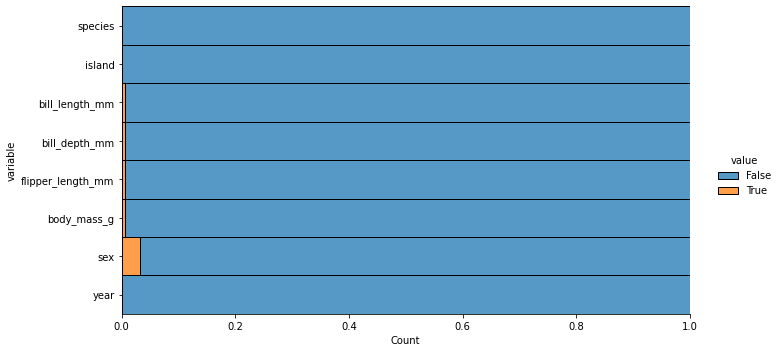

In [10]:
(
    pre_penguin_df.isnull()
    .melt()
    .pipe(
        lambda df :(
            sns.displot(
                data=df,
                y='variable',
                hue='value',
                multiple = 'fill',aspect=2
            )
        )
    )
)

### ¿Cómo podemos visualizar los valores nulos en todod el conjunto de datos?

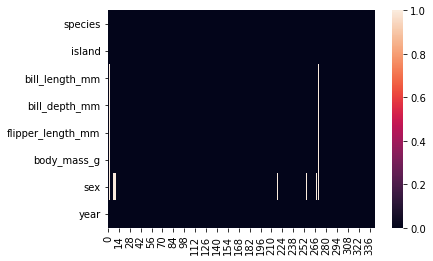

In [11]:
(
    pre_penguin_df
    .isnull()
    .transpose()
    .pipe(
        lambda df : ( 
            sns.heatmap(
                data=df
            )
        )
    )
)

### ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?

In [12]:
pred_penguin_df = (
    pre_penguin_df
    .dropna()
)

In [13]:
pred_penguin_df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


### Todas las variables

In [14]:
pred_penguin_df.describe(include ='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
count,333,333,333.000000,333.000000,333.000000,333.000000,333,333.000000
unique,3,3,NaN,NaN,NaN,NaN,2,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,male,NaN
freq,146,163,NaN,NaN,NaN,NaN,168,NaN
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN,2008.042042
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN,0.812944
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN,2007.000000
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN,2009.000000


### Solo las numéricas

In [15]:
pred_penguin_df.describe(include=[np.number])

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


### Solo categóricas -1

In [16]:
pred_penguin_df.describe(include=object)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


###Solo categóricas -2

In [17]:
(
    pred_penguin_df
    .astype({
        'species': 'category',
        'island': 'category',
        'sex': 'category'
    })
    .describe(include='category')
)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


### ¿Cómo visualizar los conteos?

#### pandas

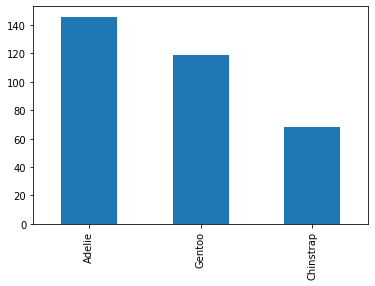

In [18]:
(
   pred_penguin_df
    .species 
    .value_counts()
    .plot(
        kind='bar'
    )
)

#### Seaborn

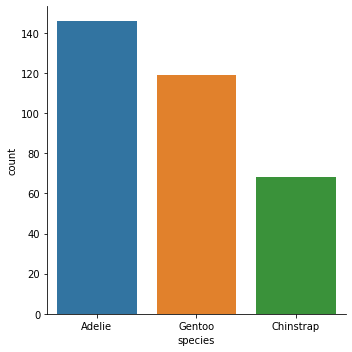

In [19]:
sns.catplot(
    data=pred_penguin_df,
    x = 'species',
    kind= 'count'
)

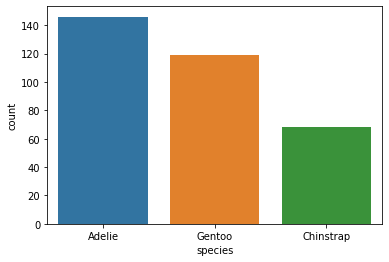

In [20]:
(
    pred_penguin_df
    .value_counts('species', sort =True)
    .reset_index(name ='count')
    .pipe(
        lambda df : (
            sns.barplot(
                data=df,
                x='species',
                y='count'
            )
        )
    )
)

### ¿Cómo visualizar las proporciones?

### Por isla


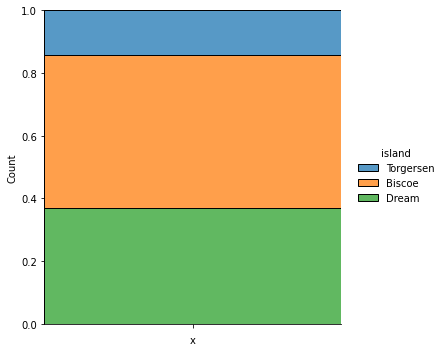

In [21]:
(
    pred_penguin_df
    .assign(x='')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='x',
                hue='island',
                multiple='fill'
            )
        )
    )
)



### Por sexo

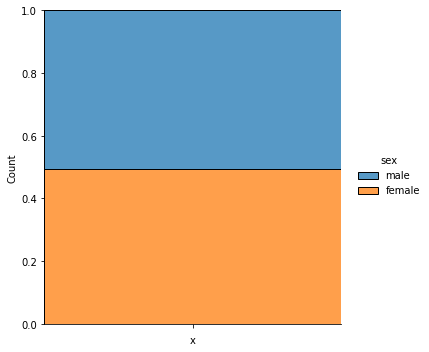

In [22]:
(
    pred_penguin_df
    .assign(x='')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='x',
                hue='sex',
                multiple='fill'
            )
        )
    )
)

### Por especie

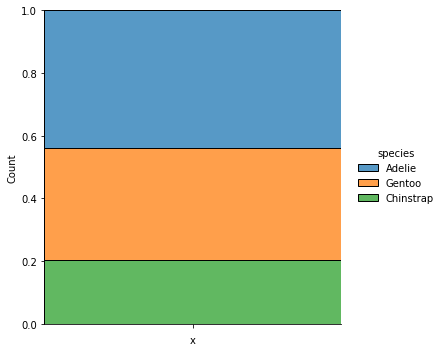

In [23]:
(
    pred_penguin_df
    .assign(x='')
    .pipe(
        lambda df: (
            sns.displot(
                data=df,
                x='x',
                hue='species',
                multiple='fill'
            )
        )
    )
)


## Tipos de Medidas de dispersion

### ¿Cuál es el valor máximo de las variables?

In [24]:
max =pred_penguin_df.max(numeric_only=True)
print(max)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
year                 2009.0
dtype: float64


### ¿Cuál es el valor mínimo de las variables?

In [25]:
min = pred_penguin_df.min(numeric_only=True)
print(min)

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                 2007.0
dtype: float64


### ¿Cuál es el rango de las variables?


In [26]:
print(max-min)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64


### ¿Cuál es la desviación estándar de las variables?

In [27]:
pred_penguin_df.std(numeric_only=True)

bill_length_mm         5.468668
bill_depth_mm          1.969235
flipper_length_mm     14.015765
body_mass_g          805.215802
year                   0.812944
dtype: float64

In [28]:
pred_penguin_df.mean(numeric_only=True)

bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year                 2008.042042
dtype: float64

### ¿Cuál es el rango intercuartílico?

In [29]:
pred_penguin_df.quantile(0.75)

bill_length_mm         48.6
bill_depth_mm          18.7
flipper_length_mm     213.0
body_mass_g          4775.0
year                 2009.0
Name: 0.75, dtype: float64

In [30]:
pred_penguin_df.quantile(0.75)-pred_penguin_df.quantile(.25)

bill_length_mm          9.1
bill_depth_mm           3.1
flipper_length_mm      23.0
body_mass_g          1225.0
year                    2.0
dtype: float64

In [31]:
(
    pred_penguin_df
    .quantile(q=[0.75,0.50,0.25])
    .transpose()
    .rename_axis('variable')
    .reset_index()
    .assign(
        iqr=lambda df : df[0.75]-df[0.25]
    )
)

,variable,0.75,0.5,0.25,iqr
0,bill_length_mm,48.6,44.5,39.5,9.1
1,bill_depth_mm,18.7,17.3,15.6,3.1
2,flipper_length_mm,213.0,197.0,190.0,23.0
3,body_mass_g,4775.0,4050.0,3550.0,1225.0
4,year,2009.0,2008.0,2007.0,2.0


## ¿Cómo puedo visualizar la distribución de una variable?

### Histograma

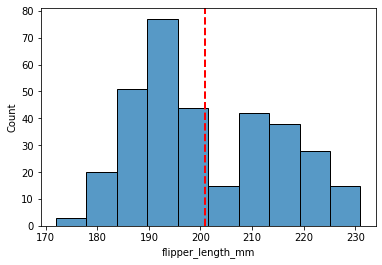

In [32]:
sns.histplot(
    data=pred_penguin_df,
    x='flipper_length_mm'
)
plt.axvline(
    x=pred_penguin_df.flipper_length_mm.mean(),
    color = 'red',
    linestyle='dashed',
    linewidth=2
)

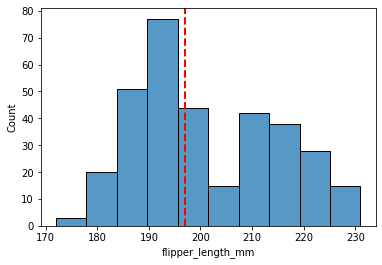

In [33]:
sns.histplot(
    data=pred_penguin_df,
    x='flipper_length_mm'
)
plt.axvline(
    x=pred_penguin_df.flipper_length_mm.median(),
    color = 'red',
    linestyle='dashed',
    linewidth=2
)

### Diagrama de caja

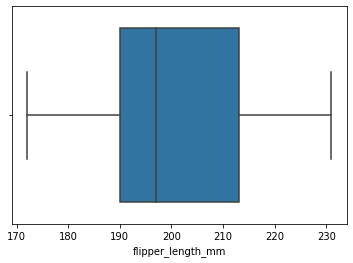

In [34]:
sns.boxplot(
    data=pred_penguin_df,
    x='flipper_length_mm'
)

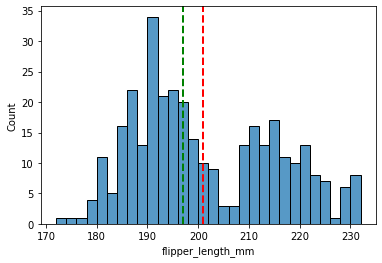

In [35]:
sns.histplot(
    data=pred_penguin_df,
    x='flipper_length_mm',
    binwidth=2
)
plt.axvline(
    x=pred_penguin_df.flipper_length_mm.mean(),
    color = 'red',
    linestyle='dashed',
    linewidth=2
)
plt.axvline(
    x=pred_penguin_df.flipper_length_mm.median(),
    color = 'green',
    linestyle='dashed',
    linewidth=2
)

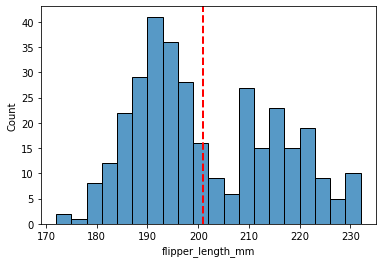

In [36]:
sns.histplot(
    data=pred_penguin_df,
    x='flipper_length_mm',
    binwidth=3
)
plt.axvline(
    x=pred_penguin_df.flipper_length_mm.mean(),
    color = 'red',
    linestyle='dashed',
    linewidth=2
)

## Estadística aplicada: Distribuciones


## Distribuciones: PMFs, CDFs y PDFs

### Utilizando seaborn

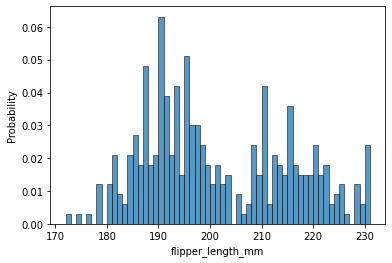

In [37]:
sns.histplot(
    data=pred_penguin_df,
    x='flipper_length_mm',
    binwidth=1,
    stat='probability'

)

### Utilizando empiricaldist

In [38]:
!pip install empiricaldist
import empiricaldist


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for empiricaldist: filename=empiricaldist-0.6.8-py3-none-any.whl size=12125 sha256=50f3121477c498792a0e978794123536e318f1908d6099d5575072be84668a48
  Stored in directory: /root/.cache/pip/wheels/c2/3f/cf/74b5adbcea4efaae43ce168e622e3eb8dbc1251d5d730dd245
Successfully built empiricaldist


In [39]:
pmf_flipper_length_mm = empiricaldist.Pmf.from_seq(
    pred_penguin_df.flipper_length_mm,
    normalize=True
)

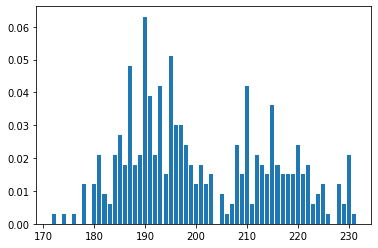

In [40]:
pmf_flipper_length_mm.bar()

In [41]:
pmf_flipper_length_mm(190)

0.06306306306306306

In [42]:
pred_penguin_df.flipper_length_mm.max()

231.0

## Funciones emprirícas de probabilidad acumulada (ECDFs)

### Utilizando seaborn

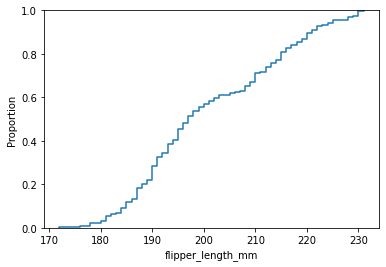

In [43]:
sns.ecdfplot(
    data=pred_penguin_df,
    x='flipper_length_mm'
)

### Utilizando empiricaldist

In [44]:
cdf_flipper_length_mm = empiricaldist.Cdf.from_seq(
    pred_penguin_df.flipper_length_mm,
    normalize=True
)

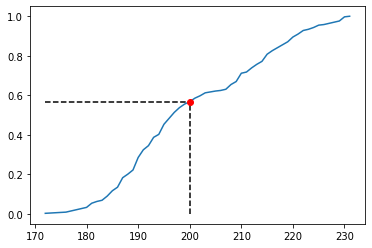

In [45]:
cdf_flipper_length_mm.plot()
q=200
p=cdf_flipper_length_mm.forward(q)


plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color='black',
    linestyle='dashed'
)

plt.hlines(
    y=p,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=q,
    color='black',
    linestyle='dashed'
)

plt.plot(q,p,'ro')

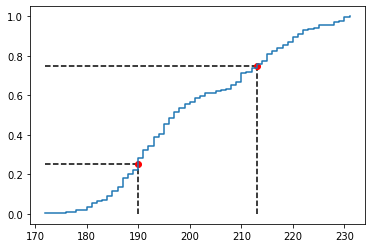

In [46]:
cdf_flipper_length_mm.step ( )
p_1 = 0.25 # Specify probability
P_2 = 0.75
ps = ( 0.25 , 0.75 ) # IQR
qs = cdf_flipper_length_mm.inverse(ps)
plt.vlines (
    x = qs,
    ymin = 0,
    ymax=ps,
    color='black',
    linestyle='dashed'
)

plt.hlines(
   y=ps,
   xmin=pmf_flipper_length_mm.qs[0],
   xmax=qs,
   color='black',
   linestyle='dashed'
)

plt.scatter(
   x=qs,
   y=ps,
   color='red',
   zorder=2
)

### En está parte se ven los rangos intercuartílicos, solo que están graficados

### Comparando distribuciones

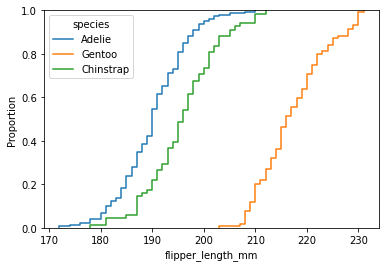

In [47]:
sns.ecdfplot(
    data=pred_penguin_df,
    x='flipper_length_mm',
    hue='species'
)

## Estadística descriptiva aplicada: funciones de densidad de probabilidad

## Funciones de densidad de probabilidad 

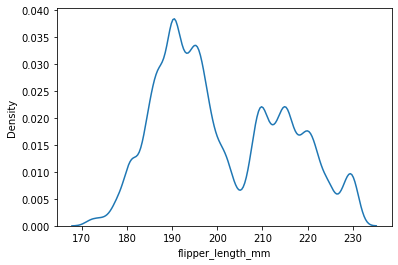

In [48]:
sns.kdeplot(
    data=pred_penguin_df,
    x='flipper_length_mm',
    bw_method=0.1
)

In [49]:
stats = pred_penguin_df.body_mass_g.describe()
stats

count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64

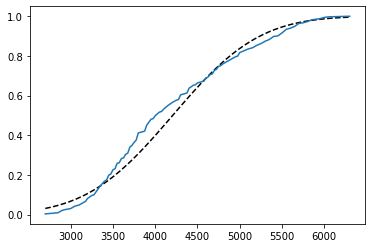

In [50]:
xs = np.linspace(stats['min'], stats['max'])
ys= scipy.stats.norm(stats['mean'], stats['std']).cdf(xs)

plt.plot(xs, ys, color='black',linestyle='dashed')

empiricaldist.Cdf.from_seq(
    pred_penguin_df.body_mass_g,
    normalize=True
).plot()

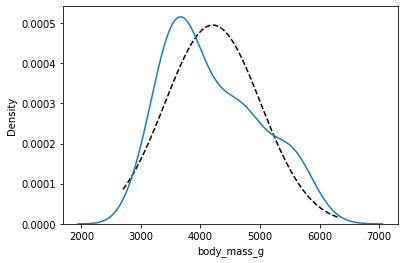

In [51]:
xs = np.linspace(stats['min'], stats['max'])
ys= scipy.stats.norm(stats['mean'], stats['std']).pdf(xs)

plt.plot(xs, ys, color='black',linestyle='dashed')

sns.kdeplot(
    data=pred_penguin_df,
    x='body_mass_g'
)

## Teorema del límite central


## Ley de los grandes números y teorema del límite central

### Teorema del Límite central

In [52]:
pred_penguin_df.sex.value_counts(normalize=True)

male      0.504505
female    0.495495
Name: sex, dtype: float64

In [53]:
sex_numeric = pred_penguin_df.sex.replace(['male', 'female'],[0,1])


In [54]:
number_samples = 1000
sample_size = 35

samples_df = pd.DataFrame()

np.random.seed(42)
for i in range(1, number_samples + 1):
    sex_numeric_sample = sex_numeric.sample(sample_size, replace=True).to_numpy()
    sample_name = f"sample_{i}"
    samples_df[sample_name] = sex_numeric_sample


male_population_mean = samples_df.mean().mean()
print(f"Estimated percentage of male penguins in population is: {male_population_mean * 100:.4f}%")

<ipython-input-54-b2084fbabf87>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  samples_df[sample_name] = sex_numeric_sample


Estimated percentage of male penguins in population is: 49.8171%


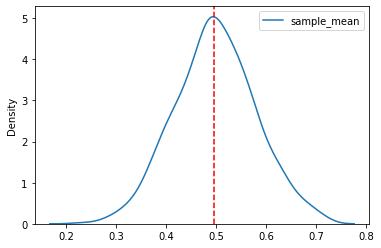

In [55]:
sample_means_binomial = pd.DataFrame(samples_df.mean(), columns=['sample_mean'])
sns.kdeplot(data=sample_means_binomial)
plt.axvline(x=sex_numeric.mean(), color='red', linestyle='dashed')

##  Gráficos de puntos

## Estableciendo relaciones: Gráfica de puntos

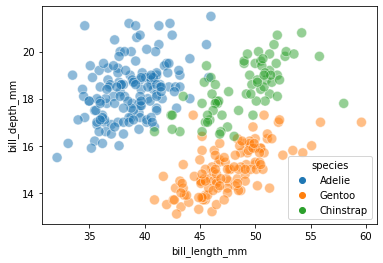

In [56]:
sns.scatterplot(
    data= pred_penguin_df,
    x='bill_length_mm',
    y= 'bill_depth_mm',
    alpha=1/2,
    s=100,
    hue='species'
)

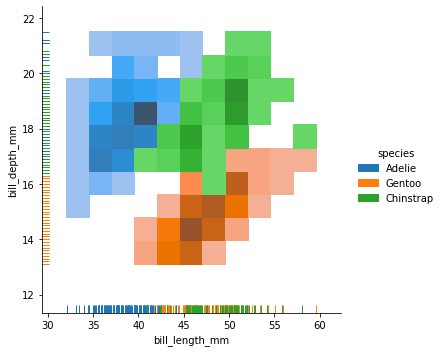

In [57]:
sns.displot(
    data=pred_penguin_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    rug=True,
    hue='species'
)

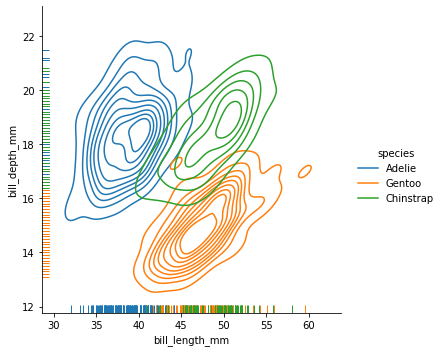

In [58]:
sns.displot(
    data=pred_penguin_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    rug=True,
    kind='kde',
    hue='species'
)

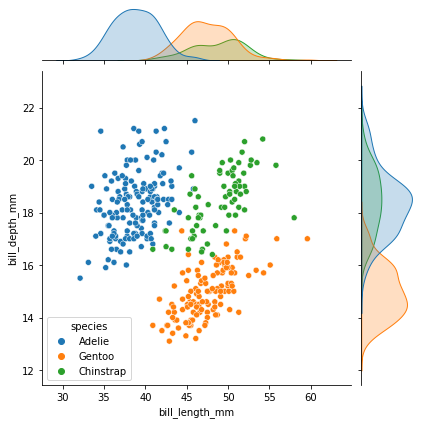

In [59]:
sns.jointplot(
    data=pre_penguin_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species'
)

##Gráficos de violín y boxplots

## Estableciendo relaciones: Gráficos de violín y boxplots

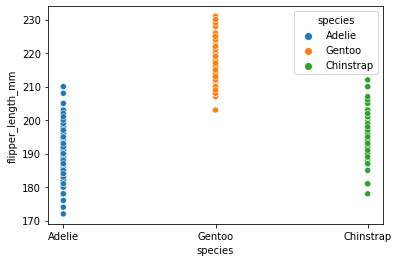

In [60]:
sns.scatterplot(
   data=pred_penguin_df,
   x='species',
   y='flipper_length_mm',
   hue='species'
   
)

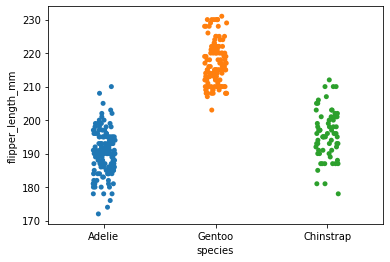

In [61]:
sns.stripplot(
    data=pred_penguin_df,
    x='species',
    y='flipper_length_mm'
)

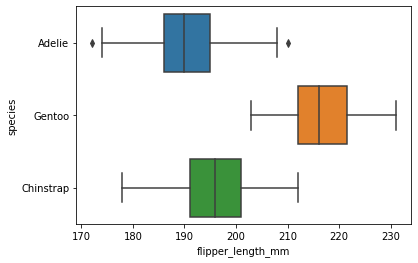

In [62]:
ax = sns.boxplot(
    data=pred_penguin_df,
    x='flipper_length_mm',
    y='species'

)



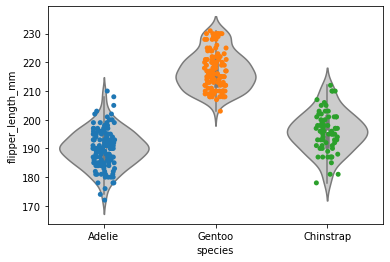

In [63]:
ax = sns.violinplot(
    data=pred_penguin_df,
    x='species',
    y='flipper_length_mm',
    color='.8'
)
ax = sns.stripplot(
    data=pred_penguin_df,
    x='species',
    y='flipper_length_mm'
)

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


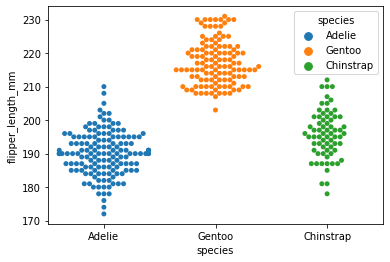

In [64]:
sns.swarmplot(
    data=pred_penguin_df,
    x='species',
    y='flipper_length_mm',
    hue='species'
)

##Matrices de correlación


## Estableciendo relaciones: Matrices de correlación

### ¿Existe una correlación lineal entre algunas de nuestras variables?

In [65]:
pred_penguin_df.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.032657
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,-0.048182
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.151068
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.021862
year,0.032657,-0.048182,0.151068,0.021862,1.000000


### ¿Cómo puedo visualizar los coeficientes de correlación?

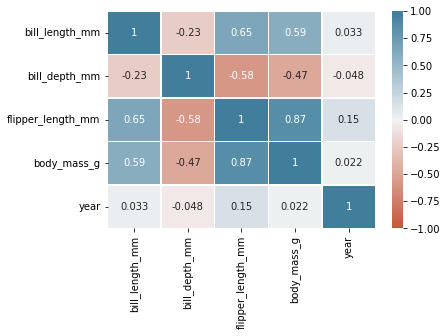

In [66]:
sns.heatmap(
    data=pred_penguin_df.corr(),
    cmap=sns.diverging_palette(20,230,as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)

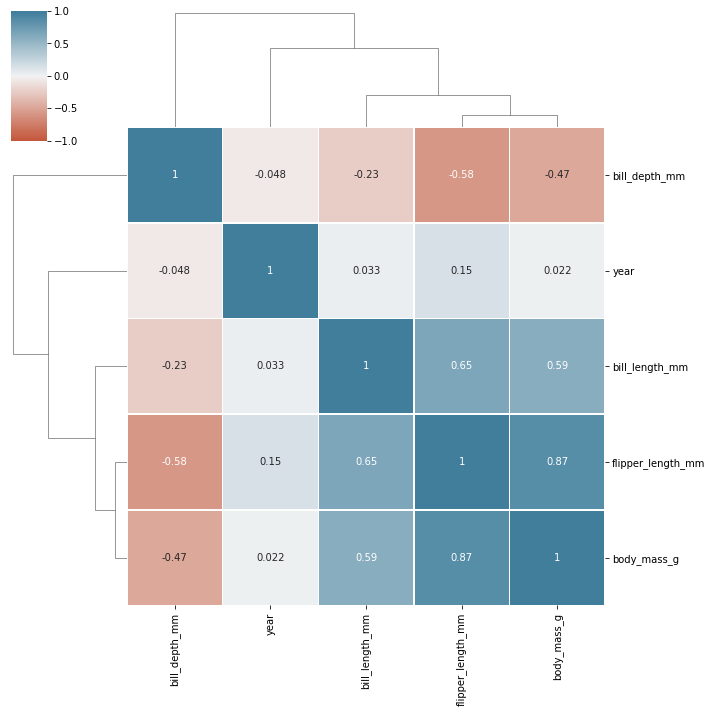

In [67]:
sns.clustermap(
    data=pred_penguin_df.corr(),
    cmap=sns.diverging_palette(20,230,as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)

### ¿Cómo podría representar una variable categórica como númerica discreta?

In [68]:
pred_penguin_df =(
    pred_penguin_df
    .assign(
        numeric_sex= lambda df: df.sex.replace(['female','male'],[0,1])
    )
)

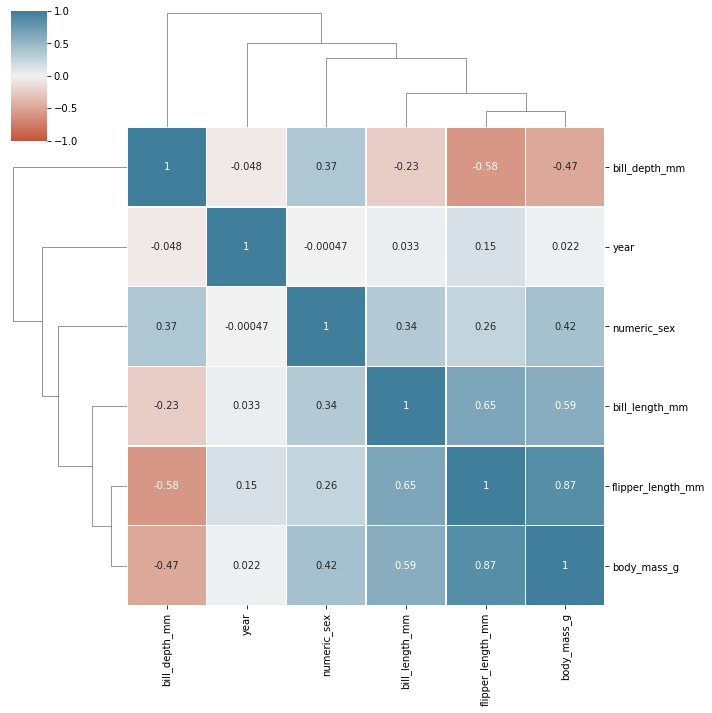

In [69]:
sns.clustermap(
    data=pred_penguin_df.corr(),
    cmap=sns.diverging_palette(20,230,as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    annot=True
)

##Limitantes de los coeficientes de correlación lineal


## ¿Cuáles son algunas limitantes de los coeficientes de correlación lineal?

### Solo nos ayuda a determinar la posible existencia de una correlación lineal; sin embargo, su ausencia no significa que no exista otro tipo de correlación

array([[1.        , 0.02062364],
       [0.02062364, 1.        ]])

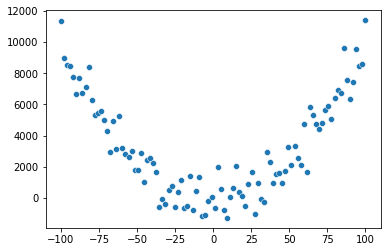

In [70]:
x = np.linspace(-100, 100, 100)
y = x**2
y += np.random.normal(0, 1000, x.size)
sns.scatterplot(
    x=x,y=y
)

np.corrcoef(x,y)

array([[1.        , 0.91656417],
       [0.91656417, 1.        ]])

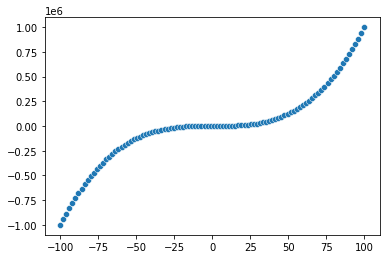

In [71]:
 x = np.linspace(-100, 100, 100)
y = x**3
y += np.random.normal(0, 1000, x.size)
sns.scatterplot(
    x=x,y=y
)

np.corrcoef(x,y)

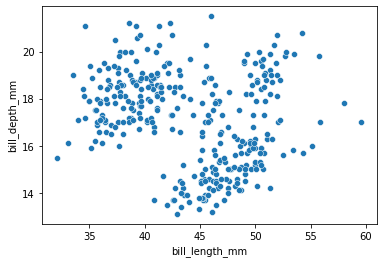

In [72]:
sns.scatterplot(
    data=  pred_penguin_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

### El coeficiente de correlación no nos habla del impacto de la revisión

[[1.         0.92761617]
 [0.92761617 1.        ]]
[[1.         0.67476343]
 [0.67476343 1.        ]]


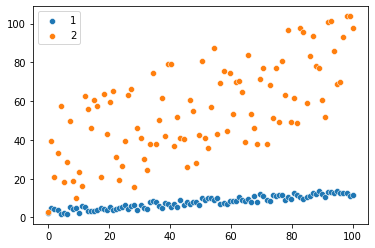

In [73]:
np.random.seed(42)
x1 = np.linspace(0,100,100)
y1 = 0.1* x1 +3 + np.random.uniform(-2,2,size=x1.size)

sns.scatterplot(x=x1, y=y1)


x2 = np.linspace(0,100,100)
y2 = 0.5* x1 +1 + np.random.uniform(0,60,size=x2.size)

sns.scatterplot(x=x2, y=y2)

plt.legend(["1","2"])

print(np.corrcoef(x1,y1))
print(np.corrcoef(x2,y2))

##Análisis de regresión simple

## Estableciendo relaiones: Análisisde regresión simple

In [74]:
r1=scipy.stats.linregress(x=x1,y=y1)
r2=scipy.stats.linregress(x=x2,y=y2)
print(r1,r2, sep='\n')

LinregressResult(slope=0.10081969280979615, intercept=2.8397383330230292, rvalue=0.9276161661149585, pvalue=1.0607043467839354e-43, stderr=0.004101050284084736, intercept_stderr=0.2373714102742458)
LinregressResult(slope=0.5470008424819226, intercept=28.519861265205236, rvalue=0.6747634267657527, pvalue=1.388369987899253e-14, stderr=0.06043657503136455, intercept_stderr=3.498107570885824)


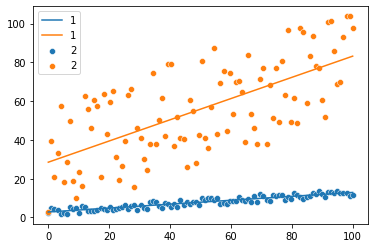

In [75]:
sns.scatterplot(x=x1, y=y1)

fx1 = np.array([x1.min(), x1.max()])
fy1 = r1.intercept + r1.slope * fx1

plt.plot(fx1, fy1)


sns.scatterplot(x=x2, y=y2)

fx2 = np.array([x2.min(), x2.max()])
fy2 = r2.intercept + r2.slope * fx2

plt.plot(fx2, fy2)

plt.legend(["1", "1","2","2"])

LinregressResult(slope=-0.08232675339862275, intercept=20.786648668433827, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)


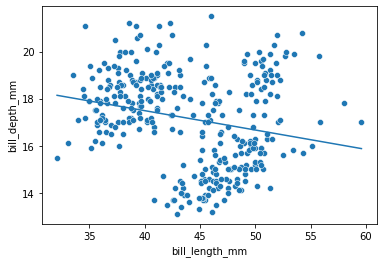

In [76]:
sns.scatterplot(
    data=pred_penguin_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)
res_penguins= scipy.stats.linregress(
    x=pred_penguin_df.bill_length_mm,
    y=pred_penguin_df.bill_depth_mm
)
print(res_penguins)
fx1 = np.array([pred_penguin_df.bill_length_mm.min(), pred_penguin_df.bill_length_mm.max()])
fy1 = res_penguins.intercept + res_penguins.slope * fx1
plt.plot(fx1,fy1)

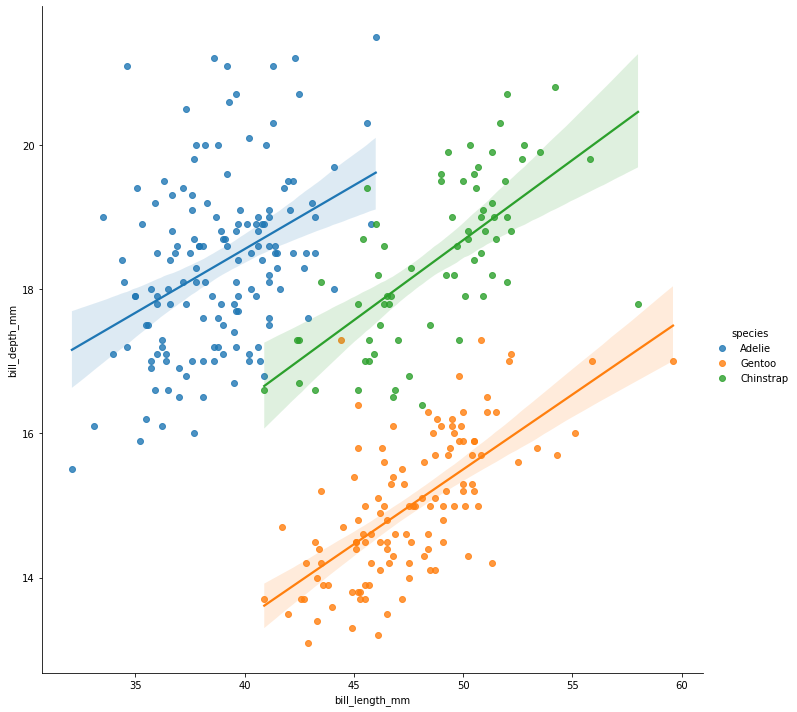

In [77]:
sns.lmplot(
    data=pred_penguin_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    height=10,
    hue='species'
)

## Limitaciones del análisis de regresión simple

### La regresión lineal simple no es simétrica

In [78]:
x = pred_penguin_df.bill_length_mm
y = pred_penguin_df.bill_depth_mm

res_x_y = scipy.stats.linregress(x=x, y=y)
res_y_x = scipy.stats.linregress(x=y, y=x)

print(res_x_y, res_y_x, sep='\n')

LinregressResult(slope=-0.08232675339862275, intercept=20.786648668433827, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.019268346735778864, intercept_stderr=0.8541730787409804)
LinregressResult(slope=-0.6349051704195019, intercept=54.89085424504755, rvalue=-0.22862563591302898, pvalue=2.5282897209443435e-05, stderr=0.1485977821662331, intercept_stderr=2.5673415135382553)


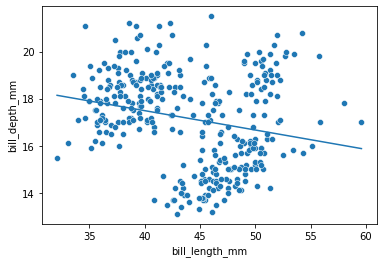

In [79]:
sns.scatterplot(
x=x,
y=y
)

fx_1= np.array([x.min(), x.max()])
fy_1= res_x_y.intercept + res_x_y.slope * fx_1

plt.plot(fx_1, fy_1)

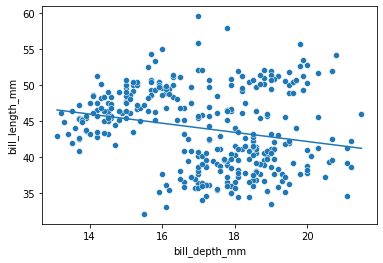

In [80]:
sns.scatterplot(
x=y,
y=x
)

fx_2= np.array([y.min(), y.max()])
fy_2= res_y_x.intercept + res_y_x.slope * fx_2

plt.plot(fx_2, fy_2);

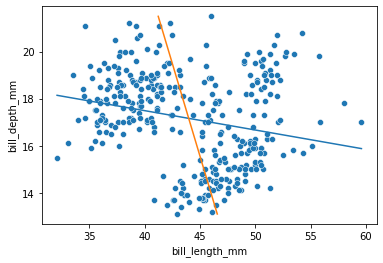

In [81]:
sns.scatterplot(
x=x,
y=y
)
plt.plot(fx_1, fy_1)
plt.plot(fy_2, fx_2)

###La regresión no nos dice nada sobre la causalidad, pero existen herramientas para separar las relaciones entre múltiples variables ###

In [82]:
(
    smf.ols(
        formula='bill_length_mm ~ bill_depth_mm',
        data= pred_penguin_df
    )
    .fit()
    .params
)


Intercept        54.890854
bill_depth_mm    -0.634905
dtype: float64

In [83]:
(
    smf.ols(
        formula='bill_depth_mm ~ bill_length_mm',
        data= pred_penguin_df
    )
    .fit()
    .params
)

Intercept         20.786649
bill_length_mm    -0.082327
dtype: float64

## Análisis de regresión múltiple

### Olvidé mi báscula para pesar a los pingüinos, ¿Cuál sería la mejor forma de capturar ese dato?

### Creando modelos

Modelo 1

In [84]:
model_1 = (
    smf.ols(
        formula='body_mass_g~bill_length_mm',
        data=pred_penguin_df
    )
    .fit()
)
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     176.2
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           1.54e-32
Time:                        22:56:16   Log-Likelihood:                -2629.1
No. Observations:                 333   AIC:                             5262.
Df Residuals:                     331   BIC:                             5270.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        388.8452    289.817      1.342      0.181    -181.271     958.961
bill_length_mm    86.7918      6.538     13.276      0.000      73.931      99.652
==============================================================================
Omnibus:                        6.141   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                4.899
Skew:                          -0.197   Prob(JB):                       0.0864
Kurtosis:                       2.555   Cond. No.                         360.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Modelo 2

In [85]:
model_2 = (
    smf.ols(
        formula='body_mass_g~bill_length_mm +bill_depth_mm',
        data=pred_penguin_df
    )
    .fit()
)
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     144.8
Date:                Mon, 30 Jan 2023   Prob (F-statistic):           7.04e-46
Time:                        22:56:16   Log-Likelihood:                -2595.2
No. Observations:                 333   AIC:                             5196.
Df Residuals:                     330   BIC:                             5208.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       3413.4519    437.911      7.795      0.000    2552.002    4274.902
bill_length_mm    74.8126      6.076     12.313      0.000      62.860      86.765
bill_depth_mm   -145.5072     16.873     -8.624      0.000    -178.699    -112.315
==============================================================================
Omnibus:                        2.839   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.242   Jarque-Bera (JB):                2.175
Skew:                          -0.000   Prob(JB):                        0.337
Kurtosis:                       2.604   Cond. No.                         644.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Modelo 3

In [86]:
model_3 = (
    smf.ols(
        formula='body_mass_g~bill_length_mm +bill_depth_mm + flipper_length_mm',
        data=pred_penguin_df
    )
    .fit()
)
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     354.9
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          9.26e-103
Time:                        22:56:16   Log-Likelihood:                -2459.8
No. Observations:                 333   AIC:                             4928.
Df Residuals:                     329   BIC:                             4943.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -6445.4760    566.130    -11.385      0.000   -7559.167   -5331.785
bill_length_mm        3.2929      5.366      0.614      0.540      -7.263      13.849
bill_depth_mm        17.8364     13.826      1.290      0.198      -9.362      45.035
flipper_length_mm    50.7621      2.497     20.327      0.000      45.850      55.675
==============================================================================
Omnibus:                        5.596   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.061   Jarque-Bera (JB):                5.469
Skew:                           0.312   Prob(JB):                       0.0649
Kurtosis:                       3.068   Cond. No.                     5.44e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Modelo 4

In [87]:
model_4 = (
    smf.ols(
        formula='body_mass_g~bill_length_mm +bill_depth_mm + flipper_length_mm + C(sex)',
        data=pred_penguin_df
    )
    .fit()
)
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     381.3
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          6.28e-122
Time:                        22:56:16   Log-Likelihood:                -2411.8
No. Observations:                 333   AIC:                             4834.
Df Residuals:                     328   BIC:                             4853.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -2288.4650    631.580     -3.623      0.000   -3530.924   -1046.006
C(sex)[T.male]      541.0285     51.710     10.463      0.000     439.304     642.753
bill_length_mm       -2.3287      4.684     -0.497      0.619     -11.544       6.886
bill_depth_mm       -86.0882     15.570     -5.529      0.000    -116.718     -55.459
flipper_length_mm    38.8258      2.448     15.862      0.000      34.011      43.641
==============================================================================
Omnibus:                        2.598   Durbin-Watson:                   1.843
Prob(Omnibus):                  0.273   Jarque-Bera (JB):                2.125
Skew:                           0.062   Prob(JB):                        0.346
Kurtosis:                       2.629   Cond. No.                     7.01e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.01e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Modelo 5

In [88]:
model_5 = (
    smf.ols(
        formula='body_mass_g~ flipper_length_mm+C(sex)',
        data=pred_penguin_df
    )
    .fit()
)
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     684.8
Date:                Mon, 30 Jan 2023   Prob (F-statistic):          3.53e-118
Time:                        22:56:16   Log-Likelihood:                -2427.2
No. Observations:                 333   AIC:                             4860.
Df Residuals:                     330   BIC:                             4872.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept         -5410.3002    285.798    -18.931      0.000   -5972.515   -4848.085
C(sex)[T.male]      347.8503     40.342      8.623      0.000     268.491     427.209
flipper_length_mm    46.9822      1.441     32.598      0.000      44.147      49.817
==============================================================================
Omnibus:                        0.262   Durbin-Watson:                   1.710
Prob(Omnibus):                  0.877   Jarque-Bera (JB):                0.376
Skew:                           0.051   Prob(JB):                        0.829
Kurtosis:                       2.870   Cond. No.                     2.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Visualizando resultados

### Creación de tabla de resultados

In [89]:
models_res = pd.DataFrame(
    dict(
        actual_value = pred_penguin_df.body_mass_g,
         prediction_model_1 = model_1.predict(),
         prediction_model_2 = model_2.predict(),
         prediction_model_3 = model_3.predict(),
         prediction_model_4 = model_4.predict(),
         prediction_model_5 = model_5.predict(),
         species = pred_penguin_df.species,
         sex= pred_penguin_df.sex
    )
)
models_res

,actual_value,prediction_model_1,prediction_model_2,prediction_model_3,prediction_model_4,prediction_model_5,species,sex
0,3750.0,3782.402961,3617.641192,3204.761227,3579.136946,3441.323750,Adelie,male
1,3800.0,3817.119665,3836.725580,3436.701722,3343.220772,3328.384372,Adelie,female
2,3250.0,3886.553073,3809.271371,3906.897032,3639.137335,3751.223949,Adelie,female
4,3450.0,3574.102738,3350.786581,3816.705772,3457.954243,3657.259599,Adelie,female
5,3650.0,3799.761313,3356.140070,3696.168128,3764.536023,3864.163327,Adelie,male
...,...,...,...,...,...,...,...,...
339,4000.0,5231.825347,4706.954140,4599.187485,4455.022405,4662.860306,Chinstrap,male
340,3400.0,4164.286703,4034.121055,4274.552753,3894.857519,4080.099176,Chinstrap,female
341,3775.0,4693.716437,4475.927353,3839.563668,4063.639819,4005.109853,Chinstrap,male
342,4100.0,4797.866549,4449.296758,4720.740455,4652.013882,4803.806832,Chinstrap,male


### ECDFs

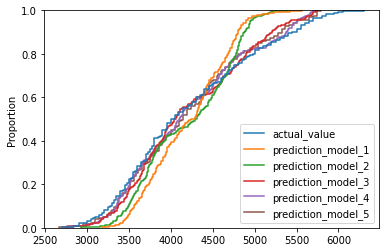

In [90]:
sns.ecdfplot(
    data= models_res
)

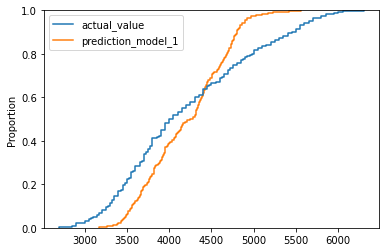

In [91]:
models_res_1 = pd.DataFrame(
    dict(
        actual_value = pred_penguin_df.body_mass_g,
         prediction_model_1 = model_1.predict(),
         species = pred_penguin_df.species,
         sex= pred_penguin_df.sex
    )
)
sns.ecdfplot(
    data= models_res_1
)

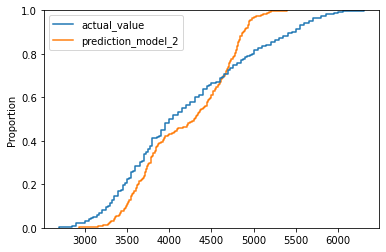

In [92]:
models_res_2 = pd.DataFrame(
    dict(
        actual_value = pred_penguin_df.body_mass_g,
         prediction_model_2 = model_2.predict(),
         species = pred_penguin_df.species,
         sex= pred_penguin_df.sex
    )
)
sns.ecdfplot(
    data= models_res_2
)

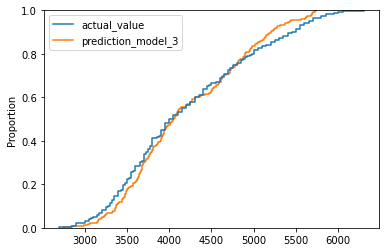

In [93]:
models_res_3 = pd.DataFrame(
    dict(
        actual_value = pred_penguin_df.body_mass_g,
         prediction_model_3 = model_3.predict(),
         species = pred_penguin_df.species,
         sex= pred_penguin_df.sex
    )
)
sns.ecdfplot(
    data= models_res_3
)

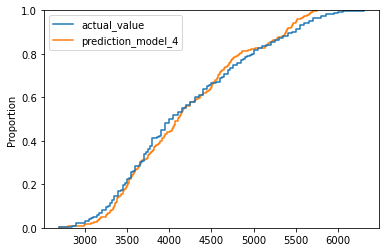

In [94]:
models_res_4 = pd.DataFrame(
    dict(
        actual_value = pred_penguin_df.body_mass_g,
         prediction_model_4 = model_4.predict(),
         species = pred_penguin_df.species,
         sex= pred_penguin_df.sex
    )
)
sns.ecdfplot(
    data= models_res_4
)

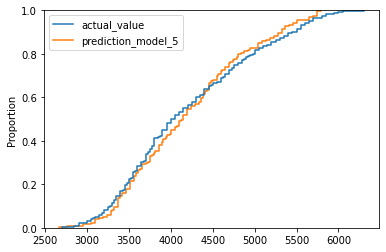

In [95]:
models_res_5 = pd.DataFrame(
    dict(
        actual_value = pred_penguin_df.body_mass_g,
         prediction_model_5 = model_5.predict(),
         species = pred_penguin_df.species,
         sex= pred_penguin_df.sex
    )
)
sns.ecdfplot(
    data= models_res_5
)

###PDFs

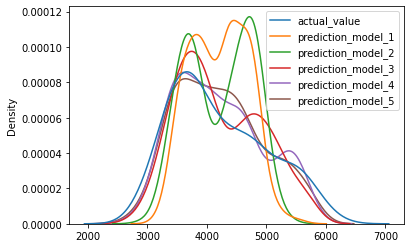

In [96]:
sns.kdeplot(
    data=models_res,

)

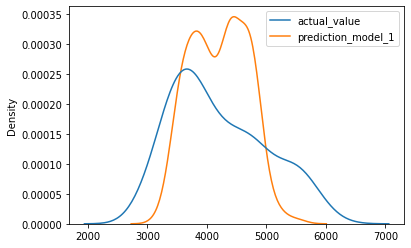

In [97]:
sns.kdeplot(
    data=models_res_1
)

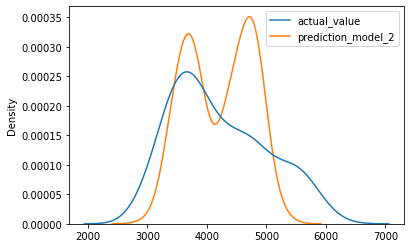

In [98]:
sns.kdeplot(
    data=models_res_2
)

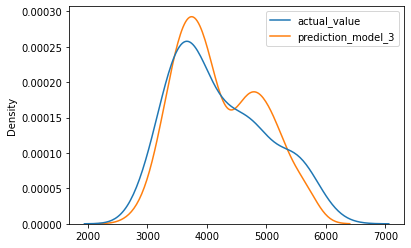

In [99]:
sns.kdeplot(
    data=models_res_3
)

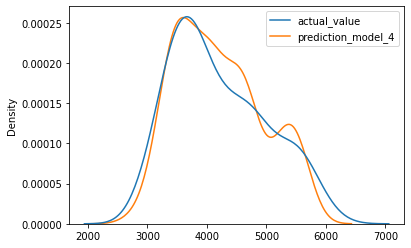

In [100]:
sns.kdeplot(
    data=models_res_4
)

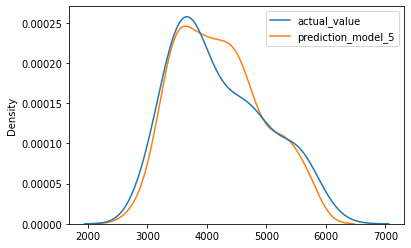

In [101]:
sns.kdeplot(
    data=models_res_5
)

### ¿Qué pudimos haber encontrado antes de hacer los modelos?

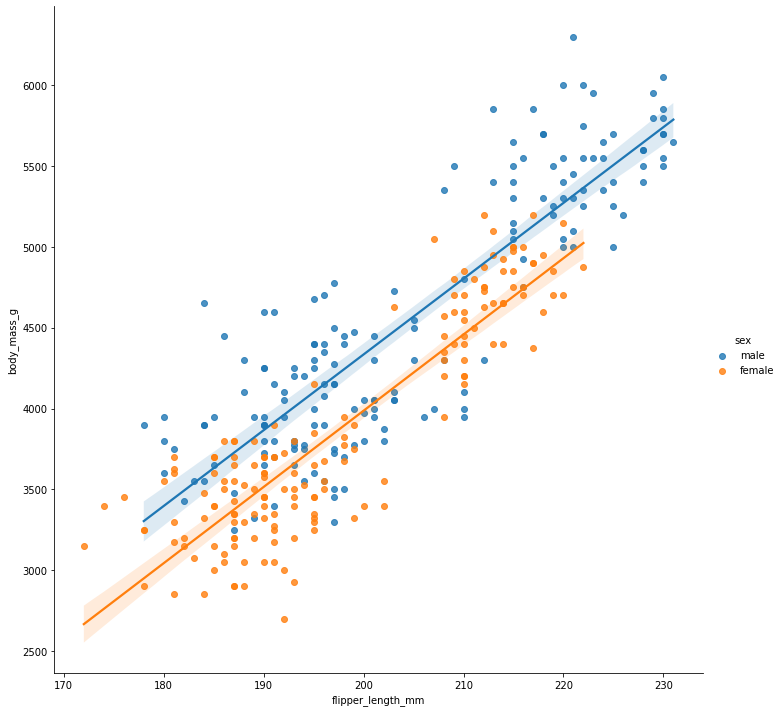

In [102]:
sns.lmplot(
    data=pred_penguin_df,
    x='flipper_length_mm',
    y='body_mass_g',
    hue='sex',
    height=10
)



## Análisis de regresión logística

¿Podemos crear un modelo que nos ayude a deinir si un pingüino es macho o hembra?

In [103]:
smf.logit(
    formula='numeric_sex ~ flipper_length_mm + bill_length_mm + bill_depth_mm + C(island)',
    data=pred_penguin_df

).fit().summary()

Optimization terminated successfully.
         Current function value: 0.360900
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            numeric_sex   No. Observations:                  333
Model:                          Logit   Df Residuals:                      327
Method:                           MLE   Df Model:                            5
Date:                Mon, 30 Jan 2023   Pseudo R-squ.:                  0.4793
Time:                        22:56:25   Log-Likelihood:                -120.18
converged:                       True   LL-Null:                       -230.80
Covariance Type:            nonrobust   LLR p-value:                 8.021e-46
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                -61.4464      6.944     -8.849      0.000     -75.057     -47.836
C(island)[T.Dream]        -1.5596      0.493     -3.163      0.002      -2.526      -0.593
C(island)[T.Torgersen]    -1.0323      0.599     -1.725      0.085      -2.205       0.141
flipper_length_mm          0.1393      0.024      5.874      0.000       0.093       0.186
bill_length_mm             0.1413      0.045      3.150      0.002       0.053       0.229
bill_depth_mm              1.6401      0.185      8.864      0.000       1.277       2.003
==========================================================================================
"""

In [104]:
pred_penguin_df.island.unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

### Exploración de nuestras variables categóricas 

In [105]:
(
    pred_penguin_df
    .value_counts(['island', 'sex'])
    .reset_index(name = 'count')
)

,island,sex,count
0,Biscoe,male,83
1,Biscoe,female,80
2,Dream,male,62
3,Dream,female,61
4,Torgersen,female,24
5,Torgersen,male,23


### ¿Podemos definir un modelo que nos ayude a identificar si un pingúino pertenece a determinada especie?

In [106]:
pred_penguin_df.species.unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [107]:
pred_penguin_df = (
    pred_penguin_df
    .assign(is_adelie = lambda df : df.species.replace(['Adelie', 'Gentoo','Chinstrap'], [1,0,0]))
)

In [108]:
model_is_adelie = smf.logit(
    formula='is_adelie ~ flipper_length_mm + C(sex)',
    data= pred_penguin_df
).fit()

model_is_adelie.params

Optimization terminated successfully.
         Current function value: 0.355225
         Iterations 8


Intercept            40.568368
C(sex)[T.male]        1.282656
flipper_length_mm    -0.209705
dtype: float64

In [109]:
is_adelie_df_predictions = pd.DataFrame(
    dict(
        actual_adelie= pred_penguin_df.is_adelie,
        predicted_values= model_is_adelie.predict().round()
    )
)
is_adelie_df_predictions

,actual_adelie,predicted_values
0,1,1.0
1,1,1.0
2,1,0.0
4,1,1.0
5,1,1.0
...,...,...
339,0,0.0
340,0,0.0
341,0,1.0
342,0,0.0


## Paradoja de Simpson

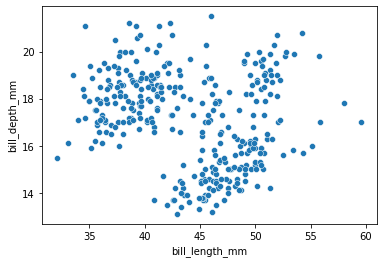

In [110]:
sns.scatterplot(
    data=pred_penguin_df,
    x='bill_length_mm',
    y='bill_depth_mm'
)

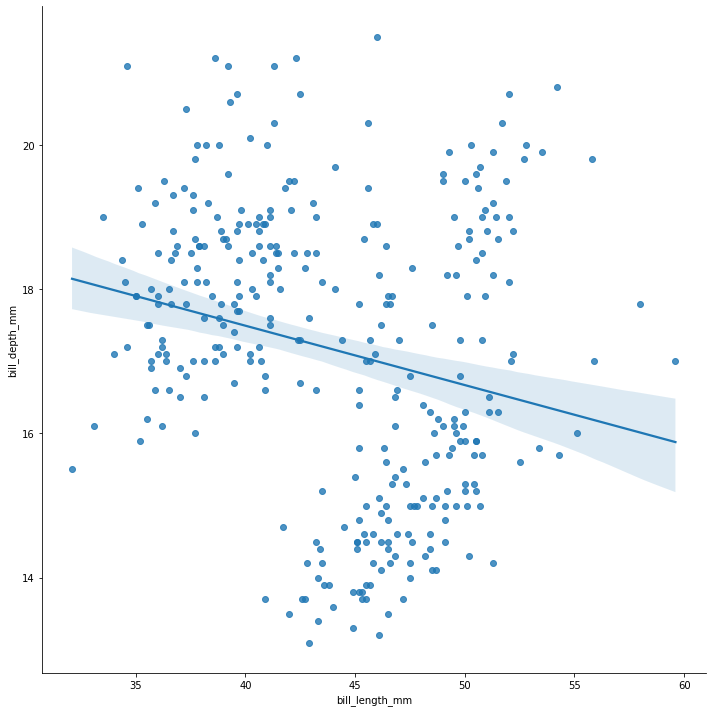

In [111]:
sns.lmplot(
    data=pred_penguin_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    height=10
)

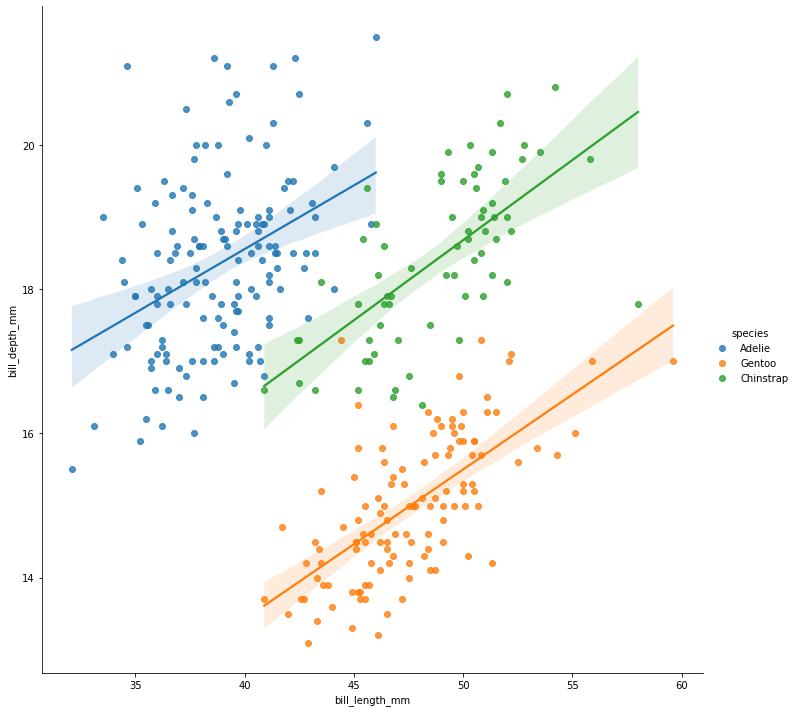

In [112]:
sns.lmplot(
    data=pred_penguin_df,
    x='bill_length_mm',
    y='bill_depth_mm',
    hue='species',
    height=10
)

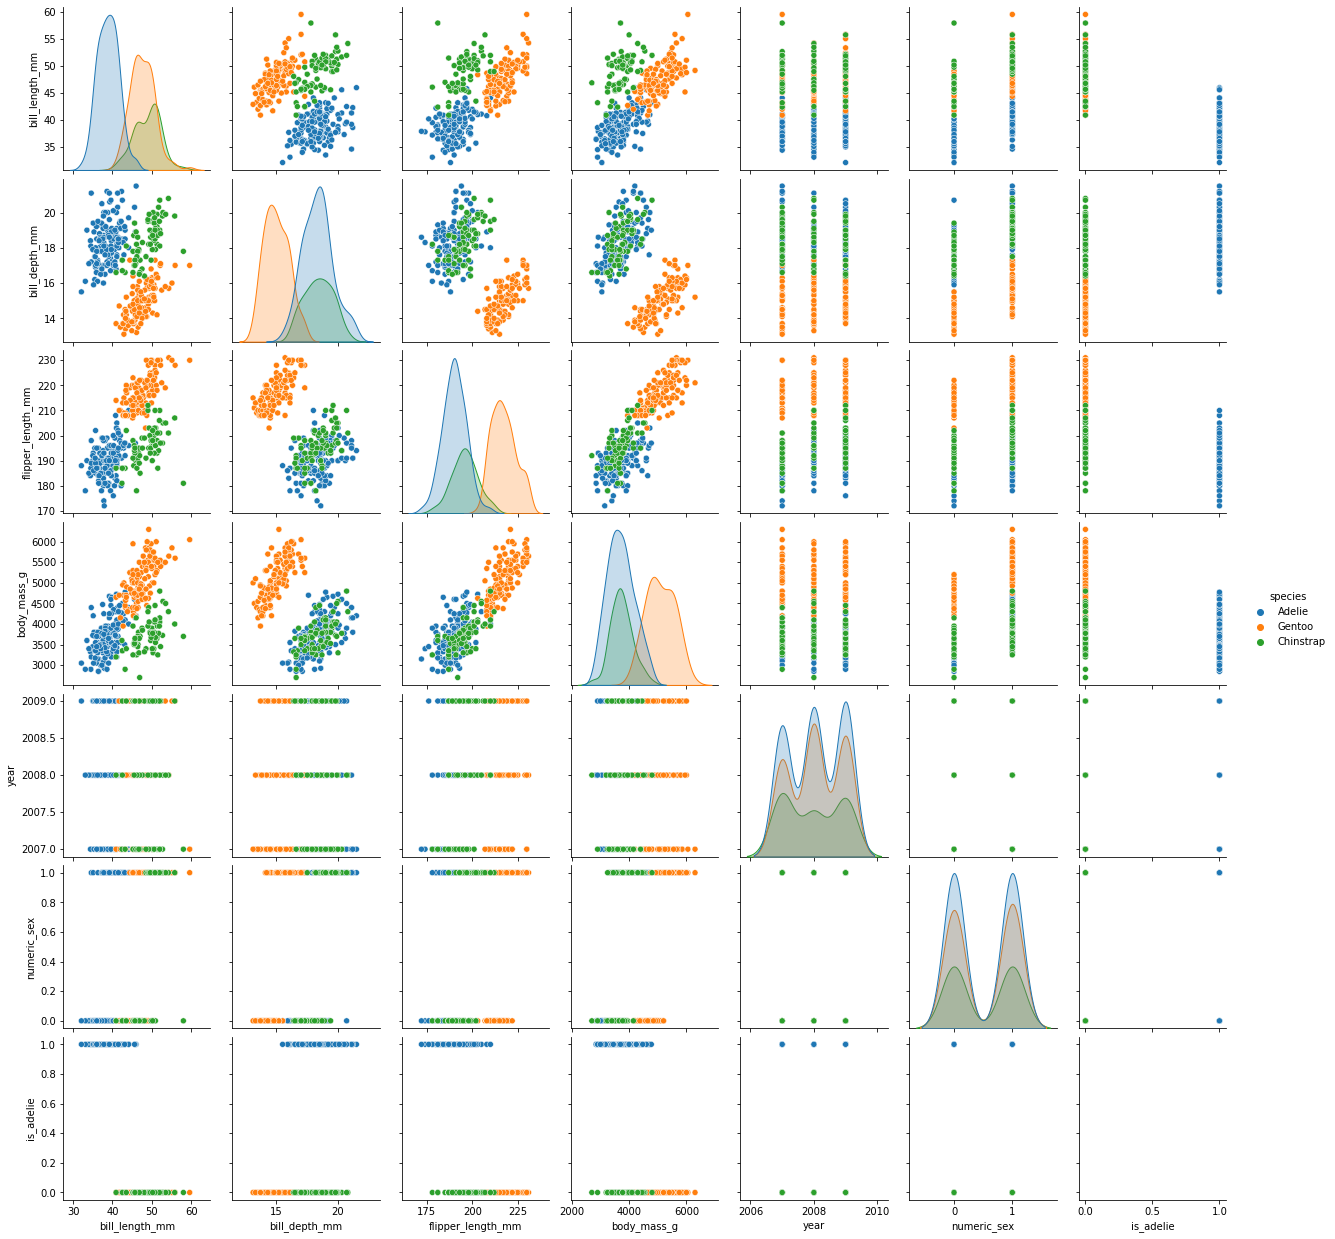

In [113]:
sns.pairplot(
    data= pred_penguin_df,
    hue='species'
)